In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data_pharm = pd.read_csv(r'C:\Users\Edwin\Downloads\drug200.csv')

data_pharm.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [3]:
gender = pd.get_dummies(data_pharm['Sex'])
gender.head()
df2 = pd.concat((data_pharm,gender), axis=1)

In [4]:
data_pharm['Sex'].replace(['M','F'],
                        [0, 1], inplace=True)

In [5]:
 data_pharm

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,0,LOW,HIGH,12.006,drugC
197,52,0,NORMAL,HIGH,9.894,drugX
198,23,0,NORMAL,NORMAL,14.020,drugX


In [6]:
data_pharm['BP'].unique() , data_pharm["Cholesterol"].unique() # Need to convert data to numbers 

(array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object))

In [7]:
data_pharm['BP'].replace(['LOW', 'NORMAL', 'HIGH'],
                        [0, 1, 2], inplace=True)

In [8]:
data_pharm['Cholesterol'].replace(['HIGH','NORMAL'],
                        [0, 1], inplace=True)

In [9]:
data_pharm

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,0,25.355,drugY
1,47,0,0,0,13.093,drugC
2,47,0,0,0,10.114,drugC
3,28,1,1,0,7.798,drugX
4,61,1,0,0,18.043,drugY
...,...,...,...,...,...,...
195,56,1,0,0,11.567,drugC
196,16,0,0,0,12.006,drugC
197,52,0,1,0,9.894,drugX
198,23,0,1,1,14.020,drugX


In [10]:
X = data_pharm.values[:,0:5]
y = data_pharm.values[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state = 30)

In [11]:
clf_gini = DecisionTreeClassifier(criterion= 'gini', random_state= 30, max_depth=4)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=30)

In [12]:
clf_entropy = DecisionTreeClassifier(criterion= 'entropy', random_state=30, max_depth=4)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=30)

In [13]:
y_pred = clf_gini.predict(X_test)
y_pred

array(['drugY', 'drugX', 'drugY', 'drugA', 'drugB', 'drugY', 'drugY',
       'drugB', 'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugC', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugA',
       'drugA', 'drugX', 'drugX', 'drugY', 'drugA', 'drugX', 'drugB',
       'drugY', 'drugC', 'drugC', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY'], dtype=object)

In [14]:
confusion_matrix(y_test, y_pred)

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  0,  0,  0, 36]], dtype=int64)

In [15]:
accuracy_score(y_test, y_pred)*100

100.0

In [16]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       drugA       1.00      1.00      1.00         6\n       drugB       1.00      1.00      1.00         3\n       drugC       1.00      1.00      1.00         5\n       drugX       1.00      1.00      1.00        16\n       drugY       1.00      1.00      1.00        36\n\n    accuracy                           1.00        66\n   macro avg       1.00      1.00      1.00        66\nweighted avg       1.00      1.00      1.00        66\n'

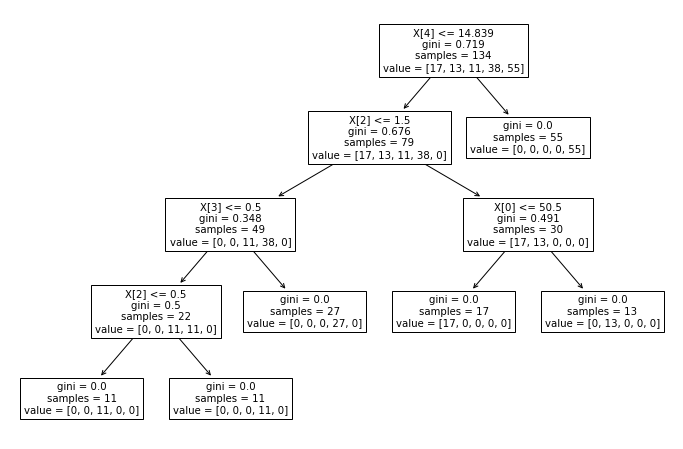

In [17]:
from sklearn import tree # showing tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 
plt.show()